In [56]:
import shutil

In [57]:
import pandas as pd

In [58]:
import os
import pathlib
import numpy as np
import tensorflow as tf
from tensorflow import keras
import csv
from collections import Counter
import random
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
import matplotlib.pyplot as plt

In [59]:
import torch
from transformers import BertTokenizerFast, BertModel

In [60]:
def read_annotation(filename):
    events = []
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            events.append(row)
    return events

In [61]:
events = read_annotation("eq_contributions.csv")
len(events)

1596

In [62]:
words_list = [e[0].lower() for e in events[1:] if e[1] == "English"]

In [63]:
len(words_list)

918

In [64]:
hq_words = ["bright","brittle","clear","crisp","harsh","hollow","sharp","shrill","tinny","woody","big","boom","boxy","dark","dull","fat","full","muddy","muffled","punch","smooth","sweet","warm","flat",
            "crunchy","deep","soothing","clean","airy","cold","metallic","booming"]

In [65]:
len(hq_words)

32

In [66]:
words_list[0:10]

['hot',
 'wet',
 'slow',
 'saucy',
 'heavy',
 'shrill',
 'warm',
 'chill',
 'sharp',
 'corn']

In [67]:
high_rated_words = list(set([e[0].lower() for e in events[1:] if e[1] == "English" and float(e[3]) > 0.7 and e[0].lower() not in hq_words]))
high_rated_words.sort()

In [68]:
high_rated_words

['aggressive',
 'baseball',
 'beautiful',
 'biting',
 'bold',
 'brash',
 'brass',
 'brassy',
 'breezy',
 'calm',
 'caring',
 'cheerful',
 'clarity',
 'cooing',
 'cool',
 'cute',
 'disgusting',
 'down',
 'edge',
 'edgy',
 'enchanting',
 'energetic',
 'energizing',
 'excited',
 'exciting',
 'fancy',
 'fluffy',
 'forceful',
 'frigid',
 'funky',
 'genius',
 'gentle',
 'good',
 'gruff',
 'happy',
 'hard',
 'heart-warming',
 'heat',
 'heavy',
 'hot',
 'huge',
 'icy',
 'jagged',
 'large',
 'light',
 'loud',
 'love',
 'low',
 'mellow',
 'mournful',
 'noisy',
 'passionate',
 'peace',
 'peaceful',
 'pleasing',
 'pleasurable',
 'plodding',
 'poor',
 'punchy',
 'quiet',
 'radiant',
 'relaxing',
 'reserved',
 'rich',
 'romantic',
 'rousing',
 'rumble',
 'serene',
 'sloppy',
 'slow',
 'soft',
 'solemn',
 'splash',
 'squeaking',
 'strong',
 'taco',
 'techno',
 'tense',
 'throbbing',
 'thumpy',
 'thunderous',
 'twangy',
 'velvety',
 'whispered',
 'whispering',
 'wistful']

In [69]:
len(high_rated_words)

86

In [70]:
# 5, 19, 71
# Using seed 302 for shuffling into folds
random.seed(302)
random.shuffle(hq_words)
random.shuffle(high_rated_words)
#test_word_set = hq_words[0:10] + high_rated_words[0:30]

In [71]:
test_word_set_1 = hq_words[0:9] + high_rated_words[0:22]
test_word_set_2 = hq_words[9:18] + high_rated_words[22:44]
test_word_set_3 = hq_words[18:27] + high_rated_words[44:66]

In [72]:
test_word_set_4 = hq_words[27:] + hq_words[0:4] + high_rated_words[66:] + high_rated_words[0:2]

In [73]:
test_word_set_4

['brittle',
 'booming',
 'sharp',
 'fat',
 'soothing',
 'dark',
 'warm',
 'boom',
 'woody',
 'whispering',
 'passionate',
 'radiant',
 'baseball',
 'beautiful',
 'strong',
 'biting',
 'wistful',
 'gentle',
 'pleasurable',
 'slow',
 'heart-warming',
 'genius',
 'heat',
 'peaceful',
 'fancy',
 'heavy',
 'brassy',
 'cheerful',
 'down',
 'brash',
 'techno']

In [74]:
cc = dict(Counter(words_list))

In [75]:
words_set = list(cc.keys())
words_set.sort()

In [76]:
len(words_set)

388

In [77]:
cc

{'hot': 8,
 'wet': 2,
 'slow': 2,
 'saucy': 1,
 'heavy': 15,
 'shrill': 4,
 'warm': 64,
 'chill': 1,
 'sharp': 8,
 'corn': 1,
 'soft': 29,
 'apple': 1,
 'deep': 6,
 'scary': 5,
 'oxygen': 1,
 'tinny': 8,
 'loud': 26,
 'flat': 3,
 'jarring': 3,
 'prickly': 1,
 'crunchy': 5,
 'excitement': 1,
 'cold': 34,
 'cool': 14,
 'relaxing': 4,
 'hard': 10,
 'light': 6,
 'funky': 4,
 'bright': 19,
 'fast': 5,
 'crisp': 8,
 'pretty': 2,
 'hollow': 3,
 'steep': 1,
 'classic': 2,
 'mellow': 8,
 'dark': 8,
 'tight': 1,
 'boom': 1,
 'sad': 9,
 'sunshine': 1,
 'fuzzy': 1,
 'carefree': 1,
 'woody': 1,
 'crunch': 1,
 'sweet': 5,
 'mournful': 1,
 'ralph': 1,
 'groovy': 1,
 'soothing': 17,
 'happy': 22,
 'damp': 1,
 'tiger': 1,
 'greasy': 1,
 'clear': 12,
 'pleasant': 6,
 'cheerful': 3,
 'creepy': 1,
 'nice': 3,
 'punch': 1,
 'delightful': 1,
 'balanced': 1,
 'car': 1,
 'gradual': 1,
 'calm': 13,
 'pleasing': 2,
 'love': 4,
 'metallic': 2,
 'cat': 2,
 'biting': 1,
 'serene': 3,
 'fast-paced': 1,
 'smooth': 1

# FourFolds

In [140]:
# Set test_word_set to test_word_set_1, test_word_set_2, test_word_set_3, test_word_set_4 for different folds
test_word_set = test_word_set_4

In [141]:
train_word_set = [w for w in words_set if w not in test_word_set]

In [142]:
train_events = [e for e in events[1:] if e[1] == "English" and e[0].lower() in train_word_set]

test_events = [e for e in events[1:] if e[1] == "English" and e[0].lower() in test_word_set and float(e[3]) > 0.7]

In [143]:
words_set = list(cc.keys())
words_set.sort()

In [144]:
train_samples = [e[0].lower() for e in train_events]
train_labels = [e[4:] for e in train_events]

test_samples = [e[0].lower() for e in test_events]
test_labels = [e[4:] for e in test_events]

In [145]:
print(len(train_events))
print(len(test_events))

751
47


In [146]:
train_samples

['hot',
 'wet',
 'saucy',
 'shrill',
 'chill',
 'corn',
 'soft',
 'apple',
 'deep',
 'scary',
 'oxygen',
 'tinny',
 'loud',
 'flat',
 'jarring',
 'prickly',
 'crunchy',
 'excitement',
 'cold',
 'cool',
 'relaxing',
 'cold',
 'hard',
 'light',
 'cool',
 'funky',
 'bright',
 'fast',
 'flat',
 'bright',
 'crisp',
 'pretty',
 'hollow',
 'soft',
 'steep',
 'classic',
 'hard',
 'cold',
 'mellow',
 'tight',
 'sad',
 'sunshine',
 'fuzzy',
 'carefree',
 'crunch',
 'sweet',
 'soft',
 'mournful',
 'tinny',
 'ralph',
 'relaxing',
 'soft',
 'groovy',
 'happy',
 'damp',
 'tinny',
 'tiger',
 'tinny',
 'greasy',
 'clear',
 'crisp',
 'pleasant',
 'soft',
 'cold',
 'creepy',
 'nice',
 'punch',
 'soft',
 'soft',
 'pleasant',
 'delightful',
 'crisp',
 'light',
 'balanced',
 'car',
 'gradual',
 'calm',
 'pleasing',
 'love',
 'metallic',
 'cat',
 'loud',
 'serene',
 'fast-paced',
 'smooth',
 'soft',
 'please',
 'upbeat',
 'loud',
 'tinny',
 'hello',
 'clear',
 'clash',
 'romantic',
 'dry',
 'breezy',
 'myst

In [147]:
train_labels

[['-1.287298455028059',
  '-1.5329640818066959',
  '-1.5065393849267092',
  '-1.396973938464201',
  '-1.2711989128944425',
  '-1.0178666691600544',
  '-0.5287290070088837',
  '0.16557358394555965',
  '0.7544001753754086',
  '1.0739920359101394',
  '1.2822107254240411',
  '1.4420600618966608',
  '1.5686854806911437',
  '1.6539996970983781',
  '1.6485038058321697',
  '1.5396735895749836',
  '1.5803471123103943',
  '1.577686577264061',
  '1.2056754706021262',
  '0.6767587910924957',
  '0.2528211232802435',
  '0.07516707774497841',
  '-0.03310109922334817',
  '-0.08911504670977308',
  '-0.1365393000994961',
  '-0.14356593912698262',
  '-0.08429928743358363',
  '-0.05102776676108934',
  '-0.03859115288560351',
  '-0.08974995193389214',
  '-0.1922442947227218',
  '-0.34500620431659407',
  '-0.529255496814794',
  '-0.7249892662082197',
  '-0.8647406029177945',
  '-0.9165421808075063',
  '-0.8395575771596734',
  '-0.8236119930372738',
  '-0.9809584059667169',
  '-1.0730892926286768'],
 ['-0.97

# Embedding Extraction

In [114]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
em_model = BertModel.from_pretrained('bert-base-uncased')


test_sentence = "This piece of music sounds relaxing."

#Tokenize the sentence and return PyTorch tensors
inputs = tokenizer(test_sentence, return_tensors="pt")

# Perform forward pass through the model
# Using no_grad() to avoid gradient computation and save memory
with torch.no_grad():
    outputs = em_model(**inputs)

# Extract the last hidden state (batch_size, sequence_length, hidden_size)
last_hidden_state = outputs.last_hidden_state

print("Shape of the hidden state:", last_hidden_state.shape)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Shape of the hidden state: torch.Size([1, 9, 768])


In [115]:
import torch.nn.functional as F

# Locate the target word in the tokenized sentence
def find_sublist(tokens, sub_tokens):
    n = len(sub_tokens)
    for i in range(len(tokens) - n + 1):
        if [t.lstrip("##") for t in tokens[i:i+n]] == [st.lstrip("##") for st in sub_tokens]:
            return i, i+n
    return None

def extract_target_vector(template, target_word):
    """
    Replace placeholder in template sentence, compute the average vector for the target word.
    """
    filled_sentence = template.replace("[MASK]", target_word)
    inputs = tokenizer(filled_sentence, return_tensors="pt", return_offsets_mapping=True)
    offset_mapping = inputs.pop("offset_mapping")  # Extract offset mapping
    
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze())
    target_token_ids = tokenizer(target_word, add_special_tokens=False)["input_ids"]
    target_tokens = tokenizer.convert_ids_to_tokens(target_token_ids)
    
    
    
    match = find_sublist(tokens, target_tokens)
    if not match:
        raise ValueError("Target word tokens not found in the sentence.")
    start_idx, end_idx = match

    # Forward pass to obtain hidden states
    with torch.no_grad():
        outputs = em_model(**inputs)
    last_hidden_state = outputs.last_hidden_state  # (1, sequence_length, hidden_size)

    # Extract and average target token vectors
    target_vectors = last_hidden_state.squeeze()[start_idx:end_idx]
    avg_vector = target_vectors.mean(dim=0)
    return avg_vector

def compute_avg_vector(target_word, templates):
    vectors = [extract_target_vector(template, target_word) for template in templates]
    return torch.stack(vectors, dim=0).mean(dim=0)  # Average across all templates

In [116]:
templates = [
    "This music sounds [MASK].",  
    "The overall tone of this music is [MASK].",  
    #"This audio conveys a [MASK] emotion, shaping the listener's perception.",  
    #"The resonance and texture of this recording are distinctly [MASK].",  
    "The spectral balance and tonal quality of this music feel [MASK], defining its timbre.",  
    #"The post-processing techniques have enhanced the sound, making it [MASK]." 
]

In [117]:
embedding_dict = {}

# 遍历 words_set 中的每个词，提取该词的 768 维嵌入
for word in words_set:
    try:
        embedding = compute_avg_vector(word, templates)
        embedding_dict[word] = embedding  # 将单词及其嵌入保存到字典中
        #print(f"【成功】{word} 的嵌入提取成功。")
    except Exception as e:
        print(f"【失败】{word} 的嵌入提取失败：{e}")

print(f"总共提取嵌入数量：{len(embedding_dict)}")

总共提取嵌入数量：388


# Data is normalised below

In [148]:

# 利用查表构建 x_train 和 x_test，如果词不存在则报错。
x_train = np.stack([embedding_dict[s] for s in train_samples], axis=0)
x_test  = np.stack([embedding_dict[s] for s in test_samples], axis=0)

# 转换y为float类型
y_train = np.array(train_labels, dtype='float')
y_test  = np.array(test_labels, dtype='float')

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (751, 768)
y_train shape: (751, 40)
x_test shape: (47, 768)
y_test shape: (47, 40)


In [91]:
mmin = np.ones((40,)) * -4
mmin

array([-4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4.,
       -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4.,
       -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4., -4.,
       -4.])

In [92]:
mmax = np.ones((40,)) * 4
mmax

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4.])

In [149]:
y_train = (y_train - mmin) / (mmax - mmin)
y_test = (y_test - mmin) / (mmax - mmin)

In [150]:
print(np.max(y_train))

print(np.max(y_test))

0.9324086192841996
0.8039976582239332


In [151]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def combined_loss(y_true, y_pred):
    # 计算 MAE 损失
    mae_loss = tf.reduce_mean(tf.abs(y_true - y_pred))
    
    # 计算余弦相似度损失。
    # tf.keras.losses.cosine_similarity 返回的是 -cos(θ)，
    # 因此我们用 1 + cosine_similarity 得到一个在 [0,2] 范围内的损失，
    # 当预测与真实向量完全一致时，cosine_similarity = -1，所以损失为 0。
    cosine_loss = 1 + tf.keras.losses.cosine_similarity(y_true, y_pred, axis=-1)
    cosine_loss = tf.reduce_mean(cosine_loss)
    
    # 按比例组合：MAE 占 60%，余弦损失占 40%
    return 0.8 * mae_loss + 0.2 * cosine_loss



# 定义学习率调度器
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True
)

# 构建模型，输入为 768 维特征，输出为 40 维 EQ 参数（归一化到 [0, 1]）
model = keras.Sequential([
    layers.Input(shape=(768,)),
    layers.Dense(768, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    # layers.Dense(80, activation='relu'),
    # layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(40, activation='sigmoid')
])

# 编译模型，使用 SGD 优化器以及上面定义的学习率调度器
model.compile(
    loss=keras.losses.MeanAbsoluteError(),
    #loss = keras.losses.CosineSimilarity(axis=-1),
    #loss = combined_loss,
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
    metrics=[keras.losses.MeanAbsolutePercentageError(
        reduction="auto", name="mean_absolute_percentage_error")
        #keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error")
        ]
)


# 查看模型结构
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 768)               590592    
                                                                 
 dropout_25 (Dropout)        (None, 768)               0         
                                                                 
 dense_31 (Dense)            (None, 512)               393728    
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 128)              

In [152]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20000, validation_data=(x_test, y_test), verbose=2, callbacks=callback)

Epoch 1/20000
24/24 - 0s - loss: 0.1053 - mean_absolute_percentage_error: 23.4651 - val_loss: 0.1037 - val_mean_absolute_percentage_error: 22.3127 - 423ms/epoch - 18ms/step
Epoch 2/20000
24/24 - 0s - loss: 0.1029 - mean_absolute_percentage_error: 22.9150 - val_loss: 0.1012 - val_mean_absolute_percentage_error: 21.7940 - 100ms/epoch - 4ms/step
Epoch 3/20000
24/24 - 0s - loss: 0.1005 - mean_absolute_percentage_error: 22.3384 - val_loss: 0.0987 - val_mean_absolute_percentage_error: 21.3789 - 99ms/epoch - 4ms/step
Epoch 4/20000
24/24 - 0s - loss: 0.0970 - mean_absolute_percentage_error: 21.5349 - val_loss: 0.0956 - val_mean_absolute_percentage_error: 20.7180 - 95ms/epoch - 4ms/step
Epoch 5/20000
24/24 - 0s - loss: 0.0950 - mean_absolute_percentage_error: 21.0645 - val_loss: 0.0944 - val_mean_absolute_percentage_error: 20.4362 - 106ms/epoch - 4ms/step
Epoch 6/20000
24/24 - 0s - loss: 0.0913 - mean_absolute_percentage_error: 20.2207 - val_loss: 0.0947 - val_mean_absolute_percentage_error: 20

### 1st

In [44]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1025 - mean_absolute_percentage_error: 23.0153


[0.1025010421872139, 23.015331268310547]

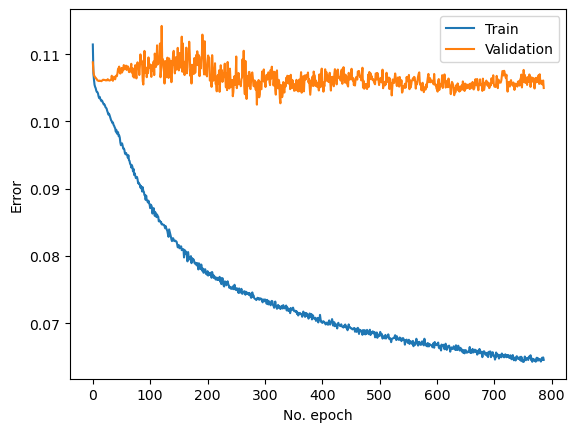

In [45]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

### 2nd（lr = 0.05）

In [48]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0955 - mean_absolute_percentage_error: 21.6025


[0.09546943753957748, 21.602460861206055]

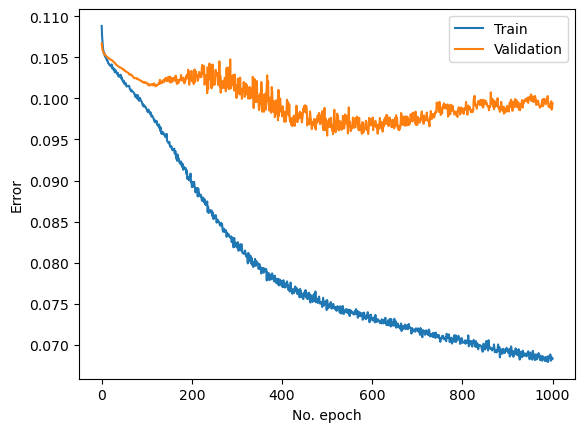

In [49]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

### 3rd lr = 0.01

In [52]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0934 - mean_absolute_percentage_error: 21.1740


[0.09339183568954468, 21.173969268798828]

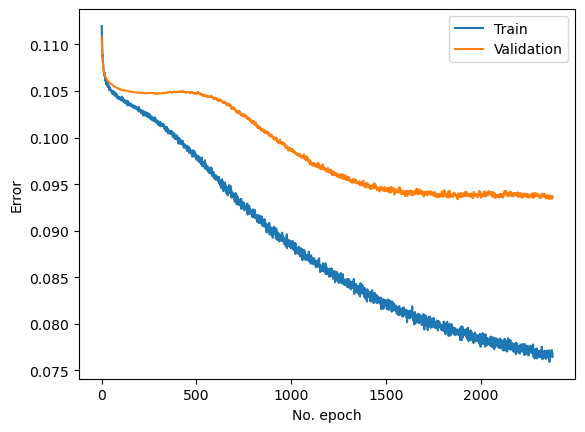

In [53]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

### 4th improve dropout rate

In [57]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0975 - mean_absolute_percentage_error: 21.9405


[0.09750325232744217, 21.94053077697754]

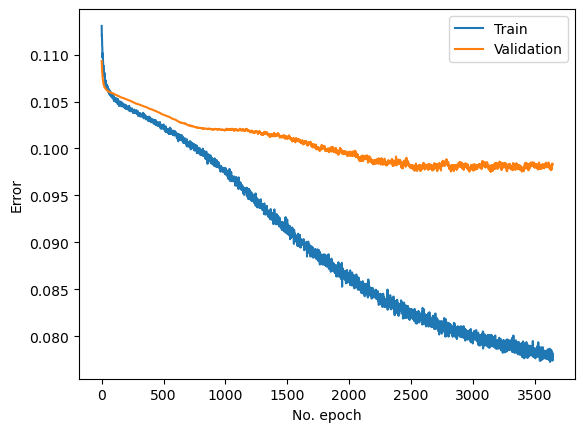

In [58]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

### 5th adding layers，dropout back to 0.1

In [61]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1004 - mean_absolute_percentage_error: 22.3488


[0.10038914531469345, 22.348773956298828]

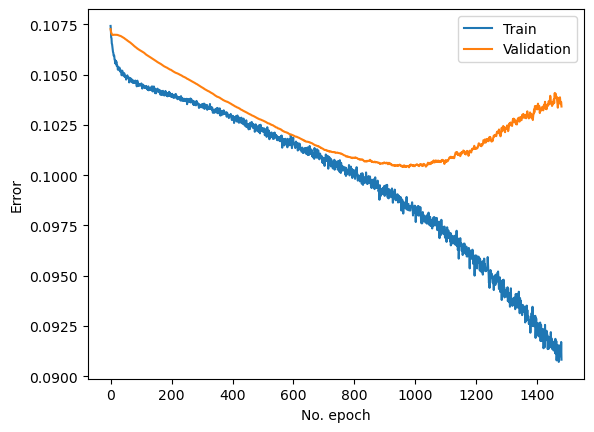

In [62]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

### Remove 1 layer，and change to Adam optimizer，lr = 0.001 _**[best till now!]**_

In [66]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0895 - mean_absolute_percentage_error: 20.5593


[0.08947484940290451, 20.559310913085938]

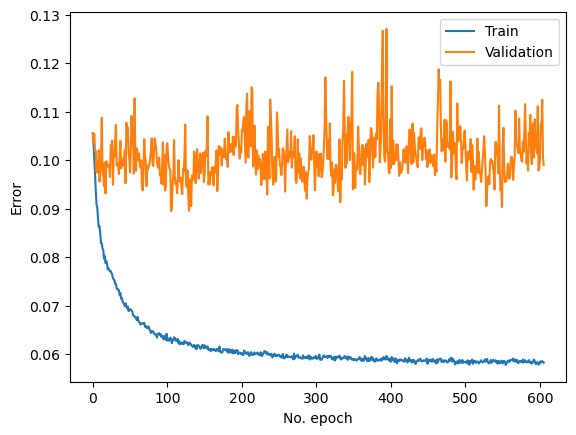

In [67]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [103]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0890 - mean_absolute_percentage_error: 20.2119


[0.08901557326316833, 20.211856842041016]

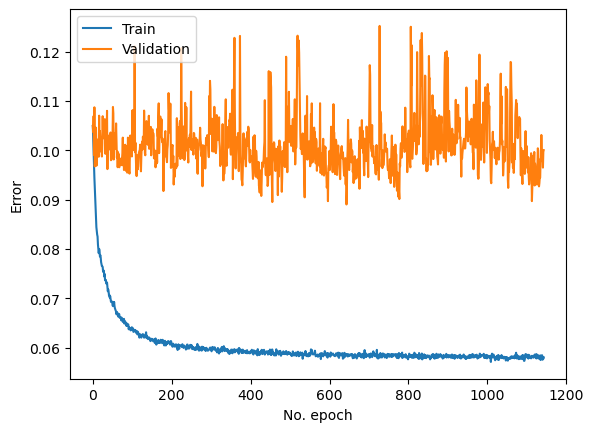

In [105]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

### what about using lr schedule...

In [70]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0918 - mean_absolute_percentage_error: 20.6962


[0.09180036187171936, 20.696205139160156]

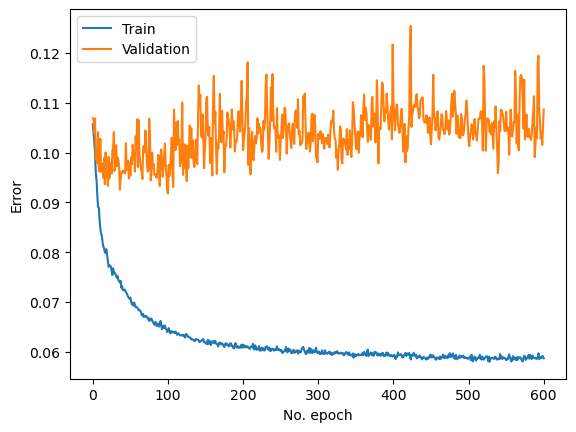

In [71]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

### remove 3 templates...

In [134]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0925 - mean_absolute_percentage_error: 21.2381


[0.0925462543964386, 21.23807144165039]

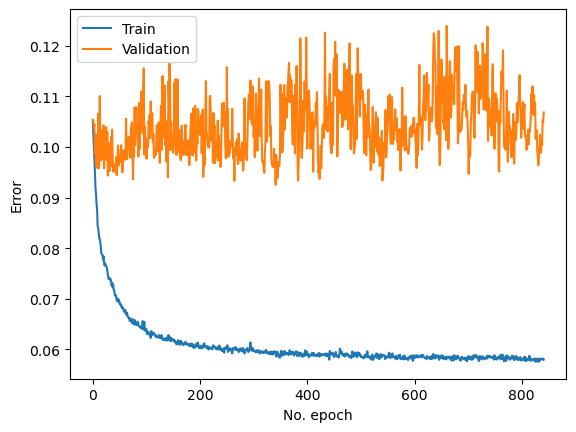

In [135]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

### what about a cosine similarity loss function?..

In [187]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: -0.9736 - mean_absolute_percentage_error: 22.8235


[-0.9735864400863647, 22.823543548583984]

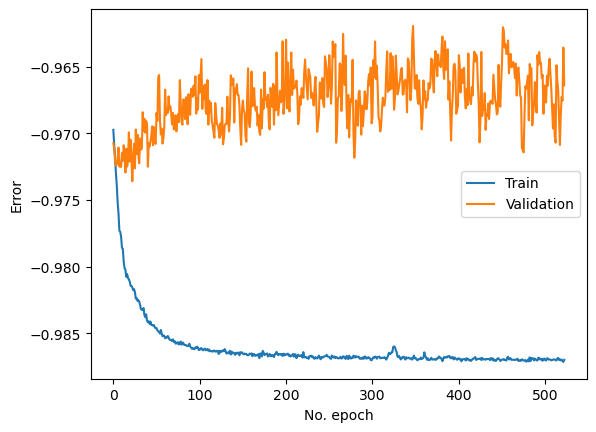

In [188]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

### Combine loss

In [209]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0796 - mean_absolute_percentage_error: 21.0985 - mean_absolute_error: 0.0963


[0.0795917734503746, 21.098506927490234, 0.09628461301326752]

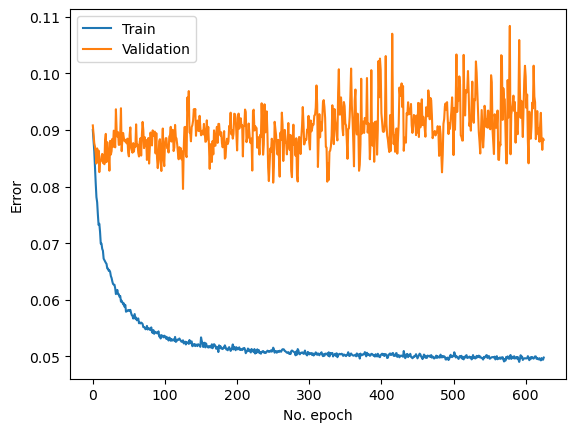

In [210]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [211]:
model.save('BERT_FirstFold_combine2.keras')

### Now the best performance is 3 templates, 6 layers, with Adam optimizer, and MAE loss

In [180]:
# do the four-fold cross validation to see the overall performance.
fold_1 = 0.08901557326316833
fold_2 = 0.08872084319591522
fold_3 = 0.08643035590648651
fold_4 = 0.08219567686319351

# 四折归一化 MAE 数值
fold_errors = np.array([
    fold_1,
    fold_2,
    fold_3,
    fold_4
])

# 转换至 dB 单位
errors_db = fold_errors * 8

# 计算均值和标准差
mean_db = errors_db.mean()
std_db = errors_db.std(ddof=0)  # 使用总体标准差
print(f"the mean absolute error in dB is {mean_db}, with a standard deviation of ±{std_db}")

the mean absolute error in dB is 0.6927248984575272, with a standard deviation of ±0.021820892355047795


In [123]:
#fold-2
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0887 - mean_absolute_percentage_error: 19.7361


[0.08872084319591522, 19.73605728149414]

In [139]:
#fold-3
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0864 - mean_absolute_percentage_error: 19.1290


[0.08643035590648651, 19.128957748413086]

In [153]:
#fold-4
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0822 - mean_absolute_percentage_error: 17.8894


[0.08219567686319351, 17.88941192626953]

In [156]:
model.save('BERT_FourthFold_MAE.keras')

# Testing

In [157]:
!pip install git+https://github.com/detly/gammatone.git

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Cloning https://github.com/detly/gammatone.git to /private/var/folders/sr/6_v8strs3_s6j1q05jw177qh0000gn/T/pip-req-build-0s2adbrs
  Running command git clone --filter=blob:none --quiet https://github.com/detly/gammatone.git /private/var/folders/sr/6_v8strs3_s6j1q05jw177qh0000gn/T/pip-req-build-0s2adbrs
  Resolved https://github.com/detly/gammatone.git to commit 0626328ef7c31d3b33214db2fdcd52e8601eb4c5
  Preparing metadata (setup.py) ... done


# Testing with audio files

In [158]:
from gammatone import filters 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display

In [159]:
# Load and listen to original audio sample

x, fs = sf.read('signals/e_gtr_short.wav')
print(f"Loaded {x.shape[0]} samples at fs={fs}")
IPython.display.Audio(x,rate=fs)

Loaded 458317 samples at fs=44100


In [160]:
# Create filters
# - I have checked the center frequencies and implementation of the filters, and they all match up the same from the paper.
c_freqs = filters.centre_freqs(fs, 40, 20)
fcoefs = filters.make_erb_filters(fs, c_freqs, width=1.0)
# Apply filterbank to audio signal and apply a given gain waiting value  to each band.
# Select a term (from the list above) and listen.
filterbank_x = filters.erb_filterbank(x, fcoefs)

In [162]:
test_word_set[2]

'sharp'

In [93]:
test_words = [ 'damage' ]            # 列表里只有 'crisp'
test_vec   = vec2(np.array(test_words)[:,None]).numpy()
#p          = model.predict(test_vec)         # 形状 (1,40)
test_vec

array([[1]])

In [95]:
test_words = 'bright'

test_vec   = compute_avg_vector(test_words,templates)

test_vec = test_vec.detach().cpu().numpy()   # 转换为 numpy 数组
test_vec.shape
test_vec = test_vec.reshape(1, -1)   
test_vec.shape


(768,)

1/1 [==============================] - 0s 37ms/step


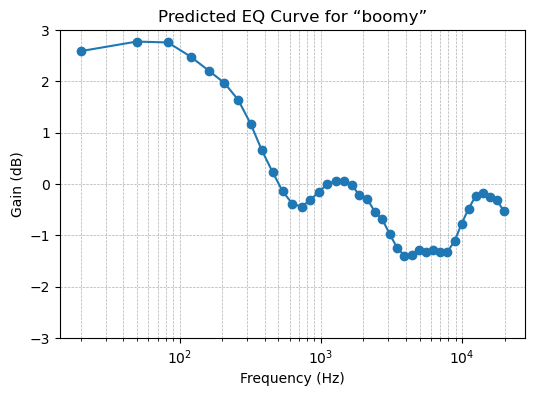

In [258]:

test_words = 'boomy'
test_model = keras.models.load_model('BERT_FourthFold_MAE.keras')
test_vec   = compute_avg_vector(test_words,templates)

test_vec = test_vec.detach().cpu().numpy()   # 转换为 numpy 数组
test_vec = test_vec.reshape(1, -1)            # 确保形状为 (1, 768)
p = test_model.predict(test_vec)

# y_test = (y_test - mmin) / (mmax - mmin)
p = p * (mmax - mmin) + mmin

# 假设 p 已经是反归一化后的预测结果，形状 (1,40)
gains_db = np.flip(1.5*p[0])  

# c_freqs 由你之前计算过
# c_freqs = filters.centre_freqs(fs, 40, 20)

plt.figure(figsize=(6,4))
plt.plot(c_freqs, gains_db, marker='o')      # 折线并在每个中心频率处画个点
plt.xscale('log')                             # 用对数坐标更符合听感
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.ylim(-3.0, +3.0)
plt.title(f"Predicted EQ Curve for “{test_words}”")
plt.grid(True, which='both', ls='--', lw=0.5)
plt.show()

# Apply filterbank to audio signal and apply a given gain waiting value  to each band.
# Select a term (from the list above) and listen.
filterbank_x = filters.erb_filterbank(x, fcoefs)
out = np.sum(filterbank_x.T * np.flip(1.5*p[0, :]),axis=1)
IPython.display.Audio(out,rate=fs)

1/1 [==============================] - 0s 11ms/step


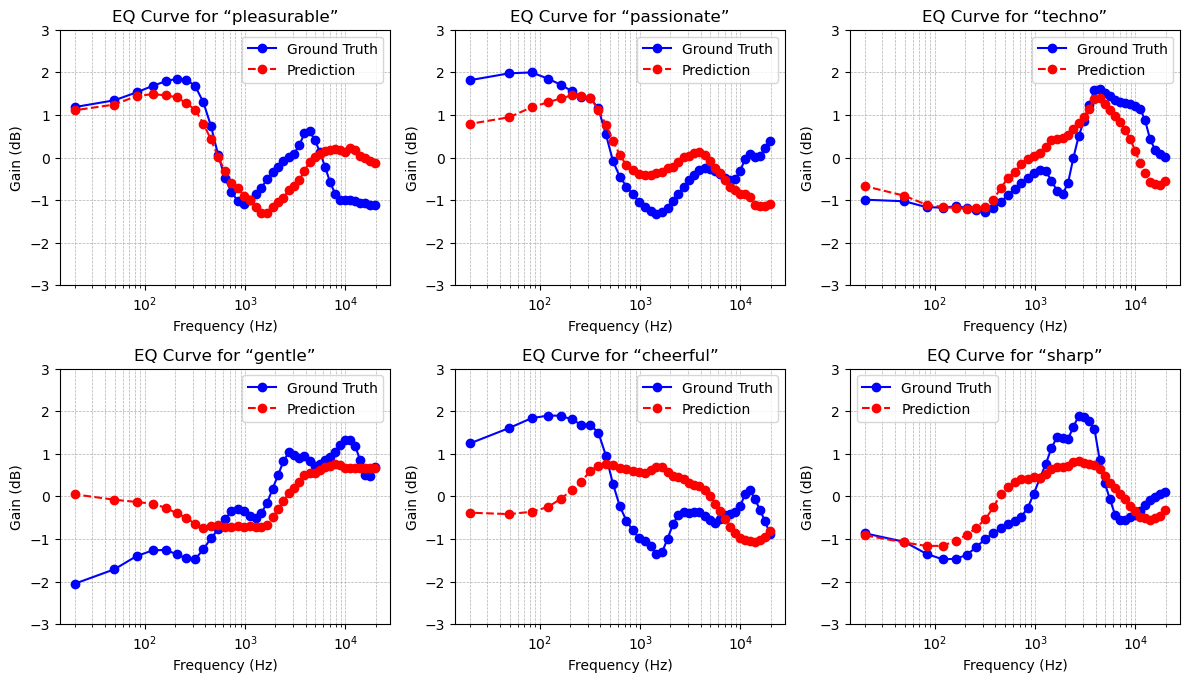

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

test_model = keras.models.load_model('BERT_FourthFold_MAE.keras')

# 固定随机种子以便重现结果
np.random.seed(78)

# 假设 test_samples 为测试词列表，y_test 为真实的 EQ 曲线（归一化后），


# 加载中心频率数组（假设已定义采样率 fs 和相关参数）
# 例如: c_freqs = filters.centre_freqs(fs, 40, 20)
# 这里假设 c_freqs 已经存在

# 随机抽取
num_curve = 6

selected_words = np.random.choice(test_word_set, num_curve, replace=False)

# 创建图形窗口，分成2x2子图显示每个抽样词的对比情况
plt.figure(figsize=(12, 20))

for i, word in enumerate(selected_words):
    indices = [idx for idx, w in enumerate(test_samples) if w == word]
    # 如果存在多个索引，随机选择一个
    selected_idx = random.choice(indices)
    
    # 利用模型获取预测曲线
    test_vec = compute_avg_vector(word, templates)
    # 将 PyTorch Tensor 转换为 numpy 数组，并重塑成 (1, 768)
    test_vec = test_vec.detach().cpu().numpy().reshape(1, -1)
    pred = test_model.predict(test_vec)
    # 反归一化：预测结果 p 是归一化后的 (0,1) 值，转换回原始 dB 值
    pred = pred * (mmax - mmin) + mmin  
    # 按频率顺序（例如从低到高）通常需要翻转
    pred_curve = np.flip(pred[0])
    
    # 获取对应的真实 EQ 曲线（假定 y_test 已经和 test_samples 对应且为归一化数据）
    gt_curve = y_test[selected_idx]
    # 反归一化真实曲线
    gt_curve = gt_curve * (mmax - mmin) + mmin
    gt_curve = np.flip(gt_curve)
    
    # 在子图中作图
    plt.subplot(num_curve,int(num_curve/2), i+1)
    plt.plot(c_freqs, gt_curve, 'b-o', label='Ground Truth')
    plt.plot(c_freqs, pred_curve, 'r--o', label='Prediction')
    plt.xscale('log')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.ylim(-3.0, +3.0)
    plt.title(f"EQ Curve for “{word}”")
    plt.legend()
    plt.grid(True, which='both', ls='--', lw=0.5)

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 10ms/step


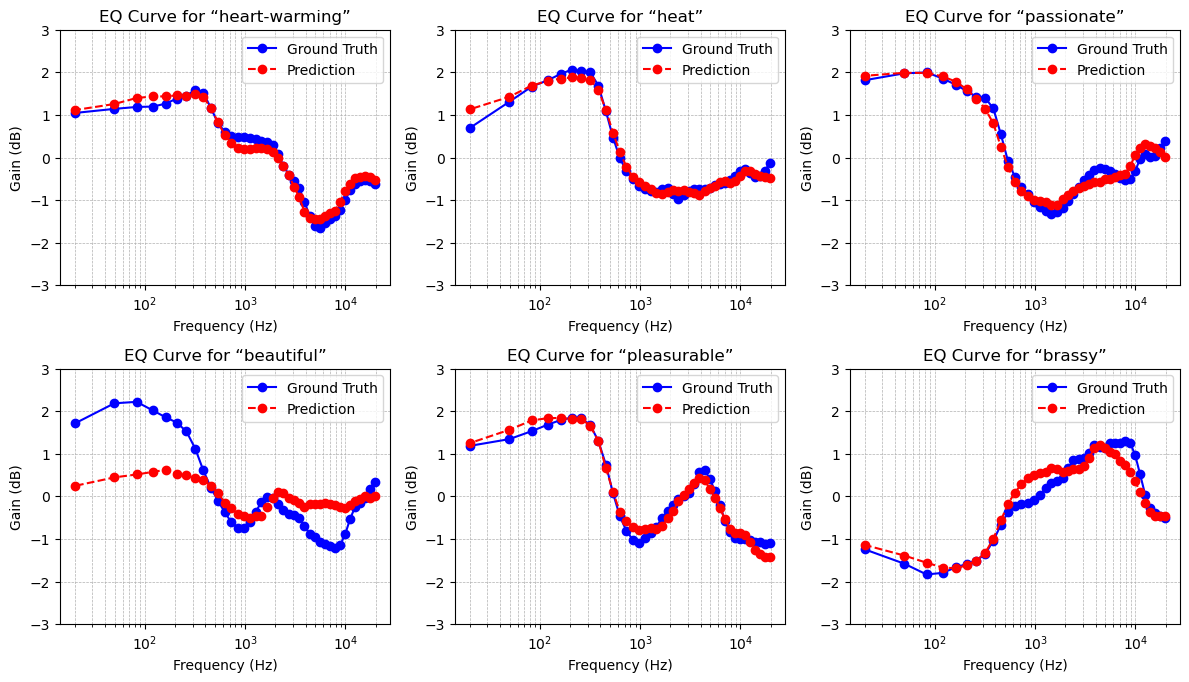

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

test_model = keras.models.load_model('BERT_FirstFold_combine2.keras',
                                     custom_objects={'combined_loss': combined_loss})

# 固定随机种子以便重现结果
np.random.seed(29)

# 假设 test_samples 为测试词列表，y_test 为真实的 EQ 曲线（归一化后），


# 加载中心频率数组（假设已定义采样率 fs 和相关参数）
# 例如: c_freqs = filters.centre_freqs(fs, 40, 20)
# 这里假设 c_freqs 已经存在

# 随机抽取
num_curve = 6

selected_words = np.random.choice(test_word_set, num_curve, replace=False)

# 创建图形窗口，分成2x2子图显示每个抽样词的对比情况
plt.figure(figsize=(12, 20))

for i, word in enumerate(selected_words):
    indices = [idx for idx, w in enumerate(test_samples) if w == word]
    # 如果存在多个索引，随机选择一个
    selected_idx = random.choice(indices)
    
    # 利用模型获取预测曲线
    test_vec = compute_avg_vector(word, templates)
    # 将 PyTorch Tensor 转换为 numpy 数组，并重塑成 (1, 768)
    test_vec = test_vec.detach().cpu().numpy().reshape(1, -1)
    pred = test_model.predict(test_vec)
    # 反归一化：预测结果 p 是归一化后的 (0,1) 值，转换回原始 dB 值
    pred = pred * (mmax - mmin) + mmin  
    # 按频率顺序（例如从低到高）通常需要翻转
    pred_curve = np.flip(pred[0])
    
    # 获取对应的真实 EQ 曲线（假定 y_test 已经和 test_samples 对应且为归一化数据）
    gt_curve = y_test[selected_idx]
    # 反归一化真实曲线
    gt_curve = gt_curve * (mmax - mmin) + mmin
    gt_curve = np.flip(gt_curve)
    
    # 在子图中作图
    plt.subplot(num_curve,int(num_curve/2), i+1)
    plt.plot(c_freqs, gt_curve, 'b-o', label='Ground Truth')
    plt.plot(c_freqs, pred_curve, 'r--o', label='Prediction')
    plt.xscale('log')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.ylim(-3.0, +3.0)
    plt.title(f"EQ Curve for “{word}”")
    plt.legend()
    plt.grid(True, which='both', ls='--', lw=0.5)

plt.tight_layout()
plt.show()